# Dice simulation
In order to prove to Ryan that wind does not appreciably change the results of his dice throws, I put together this simulation.

In [160]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec

The equations for motion with no drag. The only acceleration is due to gravity, in the `z` direction.

In [230]:
def no_drag(vx, vy, vz, x=-1, y=0.5, z=0, t=0, dt=0.01, a=-9.8):
    pos = []
    while z>=0:
        x += vx*dt
        y += vy*dt

        vz = vz + 0.5*g*(t**2)
        z = z + vz*dt
        
        t += dt
        pos.append([t, x, y, z])
    return np.array(pos)

The equations for motion with drag. Now drag acts in all directions in addition to gravity.

In [231]:
def with_drag(vx, vy, vz, x=-1, y=0.5, z=0, t=0, dt=0.01, a=-9.8, area=0.000144, 
              mass=0.0017, Cd = np.random.uniform(0.8, 1.05), rho = 1.225, windspeed=0):
    pos = []
    while z>=0:
        x += vx*dt
        ax = (0.5 * rho * (-(vx-windspeed)) * (vx-windspeed) * area)/mass
        vx += ax*dt
        
        y += vy*dt
        ay = (0.5 * rho * (-(vy)) * (vy) * area)/mass
        vy += ay*dt

        ay = (0.5*g*(t**2)) + (0.5 * rho * (-vz) * vz * area)/mass
        vz = vz + 0.5*g*(t**2)
        z = z + vz*dt
        
        t += dt
        pos.append([t, x, y, z])
    return np.array(pos)

Now I'll run 1,000 simulations with and without drag and plot the positions over time. In the first set I'll include drag but not change the windspeed.

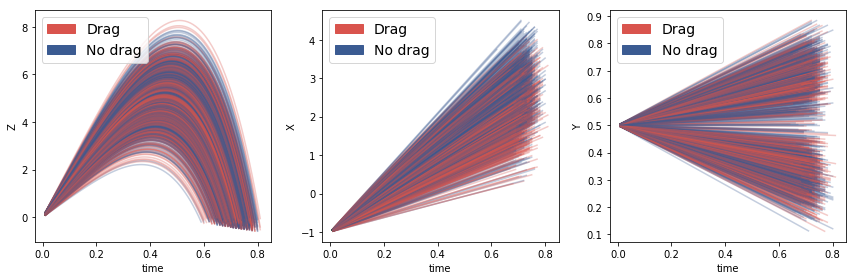

In [250]:
windspeed = 0.0

fig, ax = plt.subplots(1, 3, figsize=(12,4), sharex=True)

finalpos = []
finalpos_wd = []
for i in range(1000):
    pos = no_drag(vx=np.random.normal(loc=5, scale=1.0), 
                  vy=np.random.choice([-1,1])*np.random.normal(loc=0.25, scale=0.1), 
                  vz=np.random.normal(loc=15, scale=2.0))
    ax[0].plot(pos[:,0], pos[:, 3], color='xkcd:denim blue', alpha=0.3)
    ax[1].plot(pos[:,0], pos[:, 1], color='xkcd:denim blue', alpha=0.3)
    ax[2].plot(pos[:,0], pos[:, 2], color='xkcd:denim blue', alpha=0.3)
    finalpos.append([pos[:,1][-1], pos[:, 2][-1]])
    
    pos_wd = with_drag(vx=np.random.normal(loc=5, scale=1.0), 
                       vy=np.random.choice([-1,1])*np.random.normal(loc=0.25, scale=0.1), 
                       vz=np.random.normal(loc=15, scale=2.0), 
                       windspeed=windspeed)
    ax[0].plot(pos_wd[:,0], pos_wd[:, 3], color='xkcd:pale red', alpha=0.3)
    ax[1].plot(pos_wd[:,0], pos_wd[:, 1], color='xkcd:pale red', alpha=0.3)
    ax[2].plot(pos_wd[:,0], pos_wd[:, 2], color='xkcd:pale red', alpha=0.3)
    finalpos_wd.append([pos_wd[:,1][-1], pos_wd[:, 2][-1]])
    
finalpos=np.array(finalpos)
finalpos_wd=np.array(finalpos_wd)

ax[0].set_xlabel("time")
ax[1].set_xlabel("time")
ax[2].set_xlabel("time")

ax[0].set_ylabel("Z")
ax[1].set_ylabel("X")
ax[2].set_ylabel("Y")
    
blue_patch = mpl.patches.Patch(color='xkcd:denim blue', label='No drag')
red_patch = mpl.patches.Patch(color='xkcd:pale red', label='Drag')
ax[0].legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, )
ax[1].legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, )
ax[2].legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, )

plt.tight_layout();

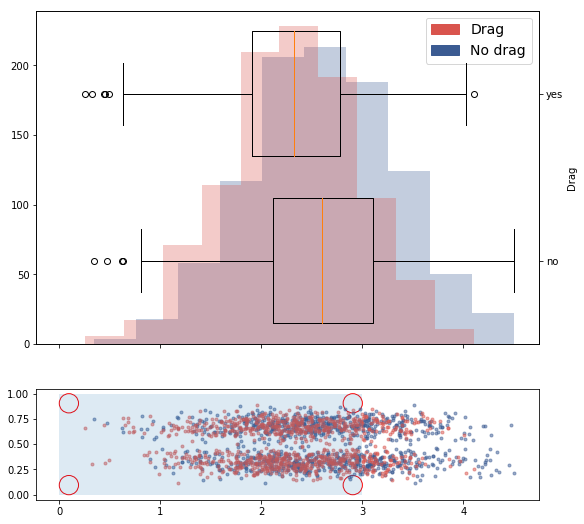

In [251]:
fig, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize=(9, 9), sharex=True)

ax0.hist(finalpos[:,0], color='xkcd:denim blue', alpha=0.3)
ax0.hist(finalpos_wd[:,0], color='xkcd:pale red', alpha=0.3)

axt = ax0.twinx()
axt.boxplot(x=[finalpos[:,0], finalpos_wd[:,0]], widths=0.75, vert=False)

ax1.add_patch(mpl.patches.Rectangle(xy=(0,0), width=3, height=1, alpha=0.15))
ax1.add_patch(mpl.patches.Circle(xy=(0.09525,0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))
ax1.add_patch(mpl.patches.Circle(xy=(0.09525,1-0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))
ax1.add_patch(mpl.patches.Circle(xy=(3-0.09525,0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))
ax1.add_patch(mpl.patches.Circle(xy=(3-0.09525,1-0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))

ax1.scatter(finalpos[:,0], finalpos[:,1], color='xkcd:denim blue', marker='.', alpha=0.5)
ax1.scatter(finalpos_wd[:,0], finalpos_wd[:,1], color='xkcd:pale red', marker='.', alpha=0.5)

axt.set_yticklabels(['no', 'yes'])
axt.set_ylabel('Drag')
blue_patch = mpl.patches.Patch(color='xkcd:denim blue', label='No drag')
red_patch = mpl.patches.Patch(color='xkcd:pale red', label='Drag')
ax0.legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, );

We can see about that there is no difference between the simulations with and without drag. Now I'll increase the windspeed (conservatively assuming that it is a direct headwind) to the highest windspeed from yesterday (~10.5 mph).

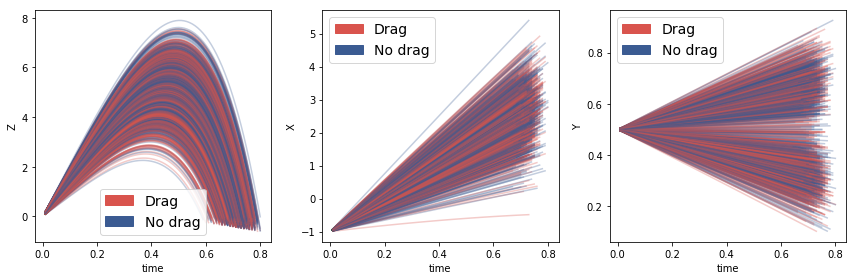

In [252]:
windspeed = 4.72253056 # yesterday's windspeed

fig, ax = plt.subplots(1, 3, figsize=(12,4), sharex=True)

finalpos = []
finalpos_wd = []
for i in range(1000):
    pos = no_drag(vx=np.random.normal(loc=5, scale=1.0), 
                  vy=np.random.choice([-1,1])*np.random.normal(loc=0.25, scale=0.1), 
                  vz=np.random.normal(loc=15, scale=2.0))
    ax[0].plot(pos[:,0], pos[:, 3], color='xkcd:denim blue', alpha=0.3)
    ax[1].plot(pos[:,0], pos[:, 1], color='xkcd:denim blue', alpha=0.3)
    ax[2].plot(pos[:,0], pos[:, 2], color='xkcd:denim blue', alpha=0.3)
    finalpos.append([pos[:,1][-1], pos[:, 2][-1]])
    
    pos_wd = with_drag(vx=np.random.normal(loc=5, scale=1.0), 
                       vy=np.random.choice([-1,1])*np.random.normal(loc=0.25, scale=0.1), 
                       vz=np.random.normal(loc=15, scale=2.0), 
                       windspeed=windspeed)
    ax[0].plot(pos_wd[:,0], pos_wd[:, 3], color='xkcd:pale red', alpha=0.3)
    ax[1].plot(pos_wd[:,0], pos_wd[:, 1], color='xkcd:pale red', alpha=0.3)
    ax[2].plot(pos_wd[:,0], pos_wd[:, 2], color='xkcd:pale red', alpha=0.3)
    finalpos_wd.append([pos_wd[:,1][-1], pos_wd[:, 2][-1]])
    
finalpos=np.array(finalpos)
finalpos_wd=np.array(finalpos_wd)

ax[0].set_xlabel("time")
ax[1].set_xlabel("time")
ax[2].set_xlabel("time")

ax[0].set_ylabel("Z")
ax[1].set_ylabel("X")
ax[2].set_ylabel("Y")

blue_patch = mpl.patches.Patch(color='xkcd:denim blue', label='No drag')
red_patch = mpl.patches.Patch(color='xkcd:pale red', label='Drag')
ax[0].legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, )
ax[1].legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, )
ax[2].legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, )

plt.tight_layout();

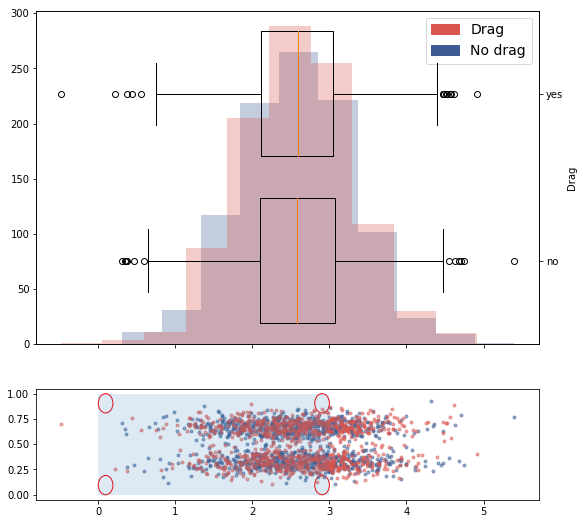

In [253]:
fig, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize=(9, 9), sharex=True)

ax0.hist(finalpos[:,0], color='xkcd:denim blue', alpha=0.3)
ax0.hist(finalpos_wd[:,0], color='xkcd:pale red', alpha=0.3)

axt = ax0.twinx()
axt.boxplot(x=[finalpos[:,0], finalpos_wd[:,0]], widths=0.75, vert=False)

ax1.add_patch(mpl.patches.Rectangle(xy=(0,0), width=3, height=1, alpha=0.15))
ax1.add_patch(mpl.patches.Circle(xy=(0.09525,0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))
ax1.add_patch(mpl.patches.Circle(xy=(0.09525,1-0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))
ax1.add_patch(mpl.patches.Circle(xy=(3-0.09525,0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))
ax1.add_patch(mpl.patches.Circle(xy=(3-0.09525,1-0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))

ax1.scatter(finalpos[:,0], finalpos[:,1], color='xkcd:denim blue', marker='.', alpha=0.5)
ax1.scatter(finalpos_wd[:,0], finalpos_wd[:,1], color='xkcd:pale red', marker='.', alpha=0.5)

axt.set_yticklabels(['no', 'yes'])
axt.set_ylabel('Drag')
blue_patch = mpl.patches.Patch(color='xkcd:denim blue', label='No drag')
red_patch = mpl.patches.Patch(color='xkcd:pale red', label='Drag')
ax0.legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, );

Again, we see no difference between the conditions. Let's double the windspeed.

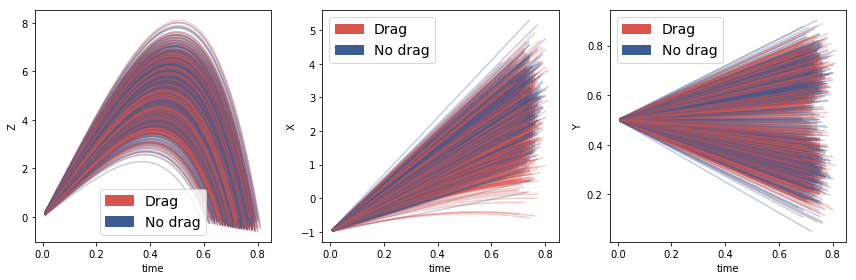

In [254]:
windspeed = 4.72253056*2 # double yesterday's windspeed

fig, ax = plt.subplots(1, 3, figsize=(12,4), sharex=True)

finalpos = []
finalpos_wd = []
for i in range(1000):
    pos = no_drag(vx=np.random.normal(loc=5, scale=1.0), 
                  vy=np.random.choice([-1,1])*np.random.normal(loc=0.25, scale=0.1), 
                  vz=np.random.normal(loc=15, scale=2.0))
    ax[0].plot(pos[:,0], pos[:, 3], color='xkcd:denim blue', alpha=0.3)
    ax[1].plot(pos[:,0], pos[:, 1], color='xkcd:denim blue', alpha=0.3)
    ax[2].plot(pos[:,0], pos[:, 2], color='xkcd:denim blue', alpha=0.3)
    finalpos.append([pos[:,1][-1], pos[:, 2][-1]])
    
    pos_wd = with_drag(vx=np.random.normal(loc=5, scale=1.0), 
                       vy=np.random.choice([-1,1])*np.random.normal(loc=0.25, scale=0.1), 
                       vz=np.random.normal(loc=15, scale=2.0), 
                       windspeed=windspeed)
    ax[0].plot(pos_wd[:,0], pos_wd[:, 3], color='xkcd:pale red', alpha=0.3)
    ax[1].plot(pos_wd[:,0], pos_wd[:, 1], color='xkcd:pale red', alpha=0.3)
    ax[2].plot(pos_wd[:,0], pos_wd[:, 2], color='xkcd:pale red', alpha=0.3)
    finalpos_wd.append([pos_wd[:,1][-1], pos_wd[:, 2][-1]])
    
finalpos=np.array(finalpos)
finalpos_wd=np.array(finalpos_wd)

ax[0].set_xlabel("time")
ax[1].set_xlabel("time")
ax[2].set_xlabel("time")

ax[0].set_ylabel("Z")
ax[1].set_ylabel("X")
ax[2].set_ylabel("Y")

blue_patch = mpl.patches.Patch(color='xkcd:denim blue', label='No drag')
red_patch = mpl.patches.Patch(color='xkcd:pale red', label='Drag')
ax[0].legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, )
ax[1].legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, )
ax[2].legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, )

plt.tight_layout();

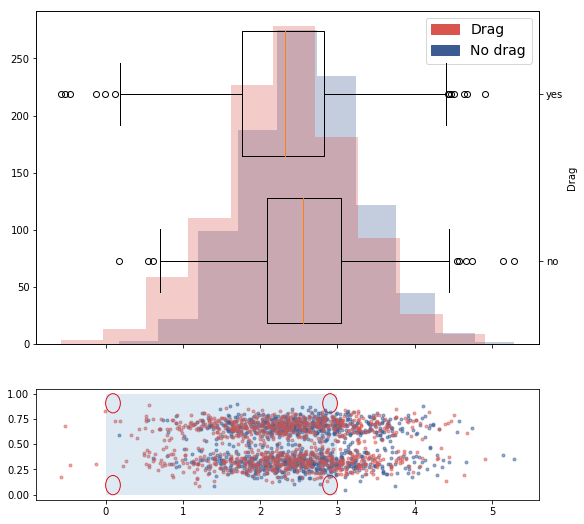

In [255]:
fig, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize=(9, 9), sharex=True)

ax0.hist(finalpos[:,0], color='xkcd:denim blue', alpha=0.3)
ax0.hist(finalpos_wd[:,0], color='xkcd:pale red', alpha=0.3)

axt = ax0.twinx()
axt.boxplot(x=[finalpos[:,0], finalpos_wd[:,0]], widths=0.75, vert=False)

ax1.add_patch(mpl.patches.Rectangle(xy=(0,0), width=3, height=1, alpha=0.15))
ax1.add_patch(mpl.patches.Circle(xy=(0.09525,0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))
ax1.add_patch(mpl.patches.Circle(xy=(0.09525,1-0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))
ax1.add_patch(mpl.patches.Circle(xy=(3-0.09525,0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))
ax1.add_patch(mpl.patches.Circle(xy=(3-0.09525,1-0.09525), radius=0.09525, edgecolor='r', facecolor='none', zorder=0))

ax1.scatter(finalpos[:,0], finalpos[:,1], color='xkcd:denim blue', marker='.', alpha=0.5)
ax1.scatter(finalpos_wd[:,0], finalpos_wd[:,1], color='xkcd:pale red', marker='.', alpha=0.5)

axt.set_yticklabels(['no', 'yes'])
axt.set_ylabel('Drag')
blue_patch = mpl.patches.Patch(color='xkcd:denim blue', label='No drag')
red_patch = mpl.patches.Patch(color='xkcd:pale red', label='Drag')
ax0.legend(handles=[red_patch, blue_patch], fontsize=14, frameon=True, );

Still no difference.